# Truman Yuen 1003914909 MIE1624 Assignment 3

In [ ]:
import pandas as pd
import numpy as np
import scipy.spatial
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
import random
import time
import os
import nltk
from nltk.corpus import stopwords  
os.environ["LANG"] = "en_US.UTF-8"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

Note: Only minor modifications were done to the webscraping tool, such as changing keywords and catching other potential errors during scraping

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\truma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\truma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\truma\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\truma\AppData\Roaming\nltk_data...


True

In [ ]:
# Ensure that the driver path is correct before running this script.
# Microsoft Windows
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver_path = "C:/Users/truma/AppData/Local/Programs/Python/Python310/geckodriver.exe"
driver = webdriver.Firefox(executable_path=driver_path, options = options)

C:\Users\truma\AppData\Local\Temp\ipykernel_11900\3386171134.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=driver_path, options = options)


In [ ]:
position = "data scientist, data analyst"
locations = "United States"

def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position, location)
    return url

url = get_url(position, locations)
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

In [ ]:
## Number of postings to scrape
postings = 1000

jn=0
for i in range(0, postings, 10):
    driver.get(url + "&start=" + str(i))
    driver.implicitly_wait(2)

    jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

    for job in jobs:
        result_html = job.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html, 'html.parser')
        
        jn += 1
        
        liens = job.find_elements(By.TAG_NAME, "a")
        links = liens[0].get_attribute("href")
        
        title = soup.select('.jobTitle')[0].get_text().strip()
        location = soup.select('.companyLocation')[0].get_text().strip()
        try:
            company = soup.select('.companyName')[0].get_text().strip()
        except:
            company = 'NaN'
        try:
            salary = soup.select('.salary-snippet-container')[0].get_text().strip()
        except:
            salary = 'NaN'
        try:
            rating = soup.select('.ratingNumber')[0].get_text().strip()
        except:
            rating = 'NaN'
        try:
            date = soup.select('.date')[0].get_text().strip()
        except:
            date = 'NaN'
        try:
            description = soup.select('.job-snippet')[0].get_text().strip()
        except:
            description = ''
       
        dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                          "Company": company,
                                          'Location': location,
                                          'Rating': rating,
                                          'Date': date,
                                          "Salary": salary,
                                          "Description": description,
                                          "Links": links}])], ignore_index=True)
        print("Job number {0:4d} added - {1:s}".format(jn,title))

Job number    1 added - Clinical Practice Data Analyst Specialist
Job number    2 added - Analyst I, Data Science
Job number    3 added - Data Analyst
Job number    4 added - Data Analyst
Job number    5 added - eCommerce Data Analyst
Job number    6 added - Jr. Data Scientist
Job number    7 added - Data Scientist II Virtual Hiring Event
Job number    8 added - Data Analyst
Job number    9 added - Junior Data Analyst
Job number   10 added - Senior Blockchain Data Analyst
Job number   11 added - HIM Data Integrity Analyst
Job number   12 added - Excel and Data Analyst
Job number   13 added - Data Analyst
Job number   14 added - Data Scientist II - AI and Machine Learning
Job number   15 added - Entry Level Data Analyst
Job number   16 added - Entry Level Data Analyst
Job number   17 added - Data Analyst
Job number   18 added - Staff Artificial Intelligence (AI) Systems Engineer
Job number   19 added - Data Analyst
Job number   20 added - Entry Level Data Scientist - Machine Learning Al

In [ ]:
driver.quit()

In [ ]:
Links_list = dataframe['Links'].tolist()
#Links_list

In [ ]:
driver = webdriver.Firefox(executable_path=driver_path, options = options)
descriptions=[]
for i in Links_list:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(2,5))

dataframe['Descriptions'] = descriptions

C:\Users\truma\AppData\Local\Temp\ipykernel_11900\2176960017.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=driver_path, options = options)


In [ ]:
driver.quit()

In [ ]:
# Convert the dataframe to a csv file
date = datetime.today().strftime('%Y-%m-%d')
dataframe.to_csv('Webscraped_Job_Descriptions.csv')

In [ ]:
dataframe

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Clinical Practice Data Analyst Specialist,SIU Medicine,"Springfield, IL",3.6,PostedPosted 30+ days ago,"$5,186 a month","Under general direction, the Clinical Practice...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Overview:\nUnder general direction, the Clinic..."
1,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 1 day ago,"$70,100 - $161,600 a year",The Complex Components team develops sophistic...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...
2,Data Analyst,Valiant Enterprises LLC,"Dallas, TX 75243 (North Dallas area)",NaN,PostedPosted 11 days ago,NaN,Addressing user questions concerning data inte...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Description:\nThis is a high impact and exciti...
3,Data Analyst,Softnice Inc.,Remote,4.0,PostedPosted 30+ days ago,"$100,000 - $200,000 a year","Verbal and written communication skills, probl...",https://www.indeed.com/company/Softnice-Inc/jo...,"Verbal and written communication skills, probl..."
4,eCommerce Data Analyst,Uline,"Pleasant Prairie, WI",3.1,PostedPosted 30+ days ago,NaN,Manage eCommerce data infrastructure inclusive...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,eCommerce Data Analyst\nCorporate Headquarters...
...,...,...,...,...,...,...,...,...,...
1484,"Mechanicsville, Maryland - Recruiting a Board ...",Sunbelt Staffing,"Mechanicsville, MD 20659",4.0,PostedPosted 5 days ago,NaN,Analyze data for case managers and help develo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Sunbelt is recruiting in the Mechanicsville, M..."
1485,Sr. Insight Analyst,Apex Systems,"Columbus, OH",3.7,PostedPosted 30+ days ago,NaN,Programming languages Java or C++ in a data mi...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job#: 1285690\n\nJob Description:\nJob Descrip...
1486,Sr. Data Scientist,Embrace Pet Insurance,United States,3.9,PostedPosted 30+ days ago,NaN,Experience with cloud computing tools such as ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Overview:\nCompany Description\nEmbrace Pet In...
1487,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,4.9,PostedPosted 15 days ago,"$110,000 - $130,000 a year","Collaborate with data engineers, data stewards...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Location: Remote\nType: Full-Time\nSalary: $11...


In [ ]:
scraped_data = pd.read_csv('Webscraped_Job_Descriptions.csv')

## EDA & Feature Engineering

### Basic Data Clean-Up and counting

In [ ]:
#combining the descriptions in the event that both descriptions are used - Note: Depreciated
scraped_data['combined_desc'] = scraped_data[['Description', 'Descriptions']].agg('-'.join, axis=1)

First, cleaning up the text of each description cell

In [ ]:
scraped_data["Number_of_words"] = scraped_data["combined_desc"].apply(lambda x: len(x.split()))

average word length

In [ ]:
average_word_length = []
for i in scraped_data['combined_desc']:
    words = i.split()
    average = sum(len(word) for word in words) / len(words)
    average_word_length.append(average)

In [ ]:
scraped_data["Average_word_length"] = average_word_length

Stop words

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
scraped_data['Number_of_stopwords'] = scraped_data['combined_desc'].apply(lambda x: len([w for w in x.split() if w in stop_words]))

In [ ]:
scraped_data

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,combined_desc,Number_of_words,Average_word_length,Number_of_stopwords
0,0,Clinical Practice Data Analyst Specialist,SIU Medicine,"Springfield, IL",3.6,PostedPosted 30+ days ago,"$5,186 a month","Under general direction, the Clinical Practice...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Overview:\nUnder general direction, the Clinic...","Overview:\nUnder general direction, the Clinic...",91,7.241758,20
1,1,"Analyst I, Data Science",Liberty Mutual Insurance,Remote,3.6,PostedPosted 1 day ago,"$70,100 - $161,600 a year",The Complex Components team develops sophistic...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Product Design and Modeling Department of ...,The Product Design and Modeling Department of ...,502,5.896414,162
2,2,Data Analyst,Valiant Enterprises LLC,"Dallas, TX 75243 (North Dallas area)",NaN,PostedPosted 11 days ago,NaN,Addressing user questions concerning data inte...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Description:\nThis is a high impact and exciti...,Description:\nThis is a high impact and exciti...,483,6.469979,123
3,3,Data Analyst,Softnice Inc.,Remote,4.0,PostedPosted 30+ days ago,"$100,000 - $200,000 a year","Verbal and written communication skills, probl...",https://www.indeed.com/company/Softnice-Inc/jo...,"Verbal and written communication skills, probl...","Verbal and written communication skills, probl...",70,6.557143,9
4,4,eCommerce Data Analyst,Uline,"Pleasant Prairie, WI",3.1,PostedPosted 30+ days ago,NaN,Manage eCommerce data infrastructure inclusive...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,eCommerce Data Analyst\nCorporate Headquarters...,eCommerce Data Analyst\nCorporate Headquarters...,417,6.148681,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1484,"Mechanicsville, Maryland - Recruiting a Board ...",Sunbelt Staffing,"Mechanicsville, MD 20659",4.0,PostedPosted 5 days ago,NaN,Analyze data for case managers and help develo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Sunbelt is recruiting in the Mechanicsville, M...","Sunbelt is recruiting in the Mechanicsville, M...",212,6.193396,48
1485,1485,Sr. Insight Analyst,Apex Systems,"Columbus, OH",3.7,PostedPosted 30+ days ago,NaN,Programming languages Java or C++ in a data mi...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job#: 1285690\n\nJob Description:\nJob Descrip...,Job#: 1285690\n\nJob Description:\nJob Descrip...,1020,6.110784,324
1486,1486,Sr. Data Scientist,Embrace Pet Insurance,United States,3.9,PostedPosted 30+ days ago,NaN,Experience with cloud computing tools such as ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Overview:\nCompany Description\nEmbrace Pet In...,Overview:\nCompany Description\nEmbrace Pet In...,555,5.972973,191
1487,1487,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,4.9,PostedPosted 15 days ago,"$110,000 - $130,000 a year","Collaborate with data engineers, data stewards...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Location: Remote\nType: Full-Time\nSalary: $11...,Location: Remote\nType: Full-Time\nSalary: $11...,514,6.369650,142


### Text Preprocessing

lower casing

In [ ]:
#restting to just the long description
scraped_data["combined_desc"] = scraped_data["Descriptions"].apply(lambda x: x.lower())

removing url's in description

In [ ]:
import re

In [ ]:
# using the 're.sub' to remove urls.
def remove_urls(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.(\w+)", "", text)
    return text

In [ ]:
scraped_data["combined_desc"] = scraped_data["combined_desc"].apply(remove_urls)

removing newline characters

In [ ]:
def remove_nl(text):
    text = re.sub('\n', ' ', text)
    return text

In [ ]:
scraped_data["combined_desc"] = scraped_data["combined_desc"].apply(remove_nl)

remove punctuation

In [ ]:
def remove_punctuation(text):
    text = re.sub(r"[^\w\s]", " ", text)
    return text

In [ ]:
scraped_data["combined_desc"] = scraped_data["combined_desc"].apply(remove_punctuation)

#### Stop word Removal

In [ ]:
scraped_data['combined_desc'] = scraped_data['combined_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#### Spelling Correction

In [ ]:
import sys
!{sys.executable} -m pip install -U textblob
from textblob import TextBlob

     ------------------------------------- 636.8/636.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
scraped_data['Descriptions'] = scraped_data.Descriptions.apply(lambda txt: ''.join(TextBlob(txt).correct()))

Tokenizing the words

In [ ]:
scraped_data['tokenized'] = scraped_data.combined_desc.apply(lambda txt:nltk.word_tokenize(txt))

Lemmazation

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
final_lem = []
for i in scraped_data['tokenized']:
        lem_sentence=[]
        for word in i:
            lem_sentence.append(wordnet_lemmatizer.lemmatize(word))
            lem_sentence.append(" ")
        final_lem.append("".join(lem_sentence))

In [ ]:
scraped_data['lemmatization'] = final_lem

### Technical and Soft Skills Extraction using skillNer

skillNer is an API that does NLP processing and extracts hard and soft skills. It is able to go through the raw descriptions (without text processing) and extract those skills by matching with a premade library of skills.  

In [2]:
!pip install skillNer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 11.8 MB/s 
  Created wheel for skillNer: filename=skillNer-1.0.3-py3-none-any.whl size=25648 sha256=f5f854a03cb7ae5551bf309315e97555ffd2d660bebb5fef0a8e635fd9162390
  Stored in directory: /root/.cache/pip/wheels/3f/14/7c/9e5d0b245f68269e49fb10c480c582bac1031b36b630e2831b
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=70628 sha256=de4d278e16da563677f6c3ccce5b6f5bd14477bf0d884076f4b993e5db580219
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built skillNer jellyfish


In [3]:
#initalizing
# imports
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Setting new columns to store hard and soft skills

In [ ]:
scraped_data['hard skill'] = 0
scraped_data['soft skill'] = 0

Looping through every description and appending the skills

In [ ]:
for i in range(len(scraped_data.axes[0])):
    #counter
    print(i)
    #initialize
    hard_skill = []
    soft_skill = []
    #the string associated with each row
    extract = scraped_data['lemmatization'][i]
    #using try to mitigate possible errors with the skillNer API (if strings are too long, index errors occur)
    try:
        raw_data = skill_extractor.annotate(extract)
        raw_skill = raw_data['results']['ngram_scored']
        for j in range(len(raw_skill)):
            if SKILL_DB[raw_skill[j]['skill_id']]['skill_type'] == 'Hard Skill':
                hard_skill.append(raw_skill[j]['doc_node_value'])
            elif SKILL_DB[raw_skill[j]['skill_id']]['skill_type'] == 'Soft Skill':
                soft_skill.append(raw_skill[j]['doc_node_value'])
    #if excption happens, the cell will be set as empty and those rows will be dropped
    except:
        hard_skill = []
        soft_skill = []
    #saving the information in a new cell
    scraped_data['hard skill'][i] = hard_skill
    scraped_data['soft skill'][i] = soft_skill


Saving the data as it takes a long time to run

In [ ]:
scraped_data.to_csv('extracted_skills_tech_and_soft.csv')

In [ ]:
scraped_data = pd.read_csv('/content/drive/MyDrive/MIE1624/extracted_skills_tech_and_soft_revised.csv')

Converting CSV string data back to lists in the hard skill and soft skill columns for better data extraction and analysis

In [ ]:
import ast #evaluates string statements as their literal definition
for i in range(len(scraped_data.axes[0])):
    scraped_data['hard skill'][i] = ast.literal_eval(scraped_data['hard skill'][i])
    scraped_data['soft skill'][i] = ast.literal_eval(scraped_data['soft skill'][i])

<ipython-input-6-22fc605e76f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scraped_data['hard skill'][i] = ast.literal_eval(scraped_data['hard skill'][i])
<ipython-input-6-22fc605e76f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scraped_data['soft skill'][i] = ast.literal_eval(scraped_data['soft skill'][i])


Creating a list of unique values of hard and soft skills using set().

In [ ]:
#initializing the empty lists
unique_tech = []
unique_soft = []

#for every element in scraped_data, 2 new lists will be created to identify unique entries of skills
for i in range(len(scraped_data.axes[0])):
    unique_tech = unique_tech + scraped_data['hard skill'][i]
    unique_soft = unique_soft + scraped_data['soft skill'][i]

#sets hold only unique values and function very similarly to a list to save on computation time
uni_tech = set(unique_tech)
uni_soft = set(unique_soft)

### WordCloud Plot

Plotting Wordcloud for hard skills and soft skills

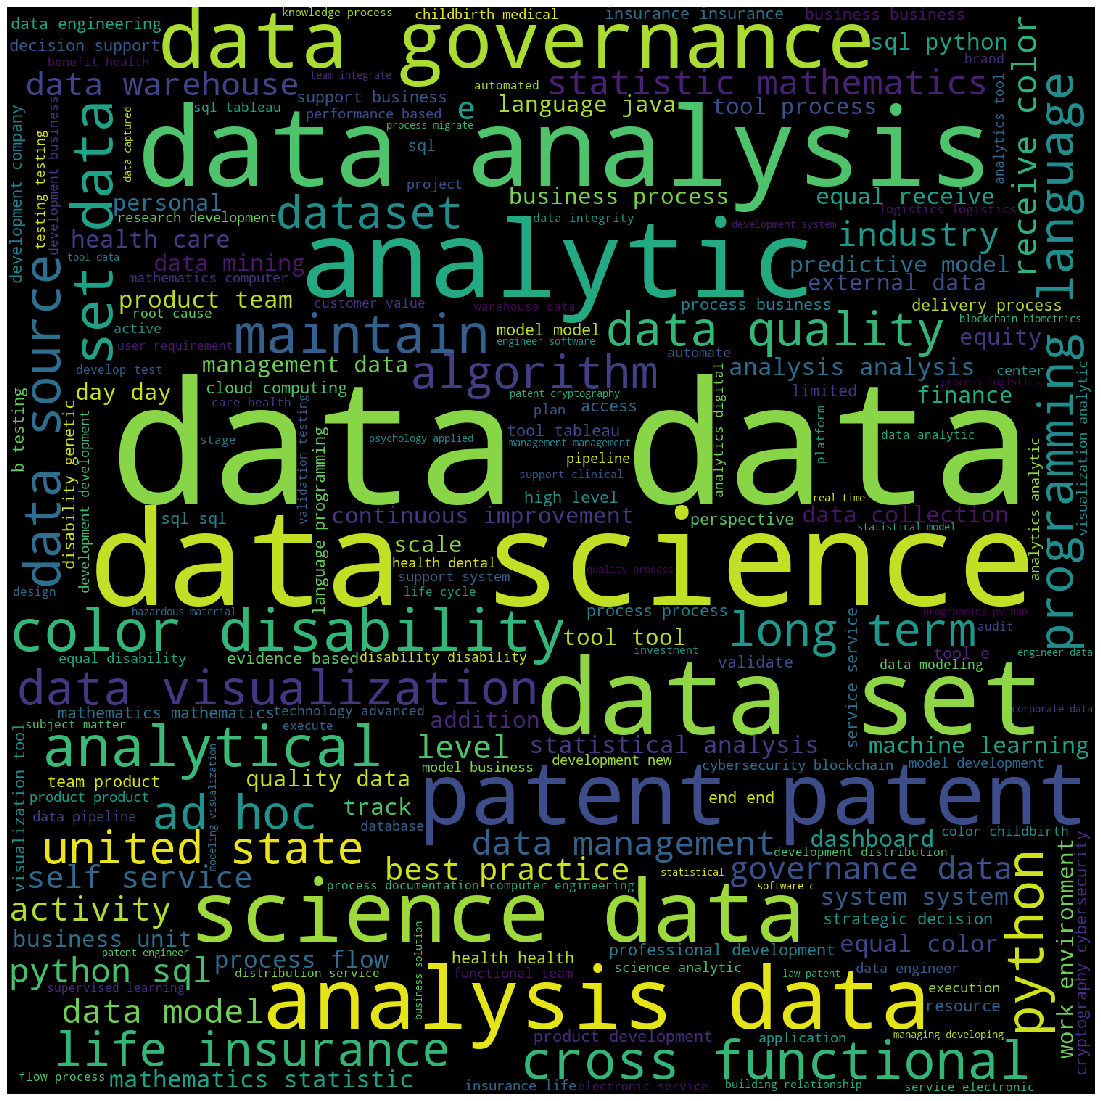

In [ ]:
## Visualize data for hard skills

# technical skill wordcloud
text = (" ").join(unique_tech) #wordcloud generated by the occurrence of certain skills in the scraped data
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1500, height=1500).generate(text)
# Display the generated image:
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()

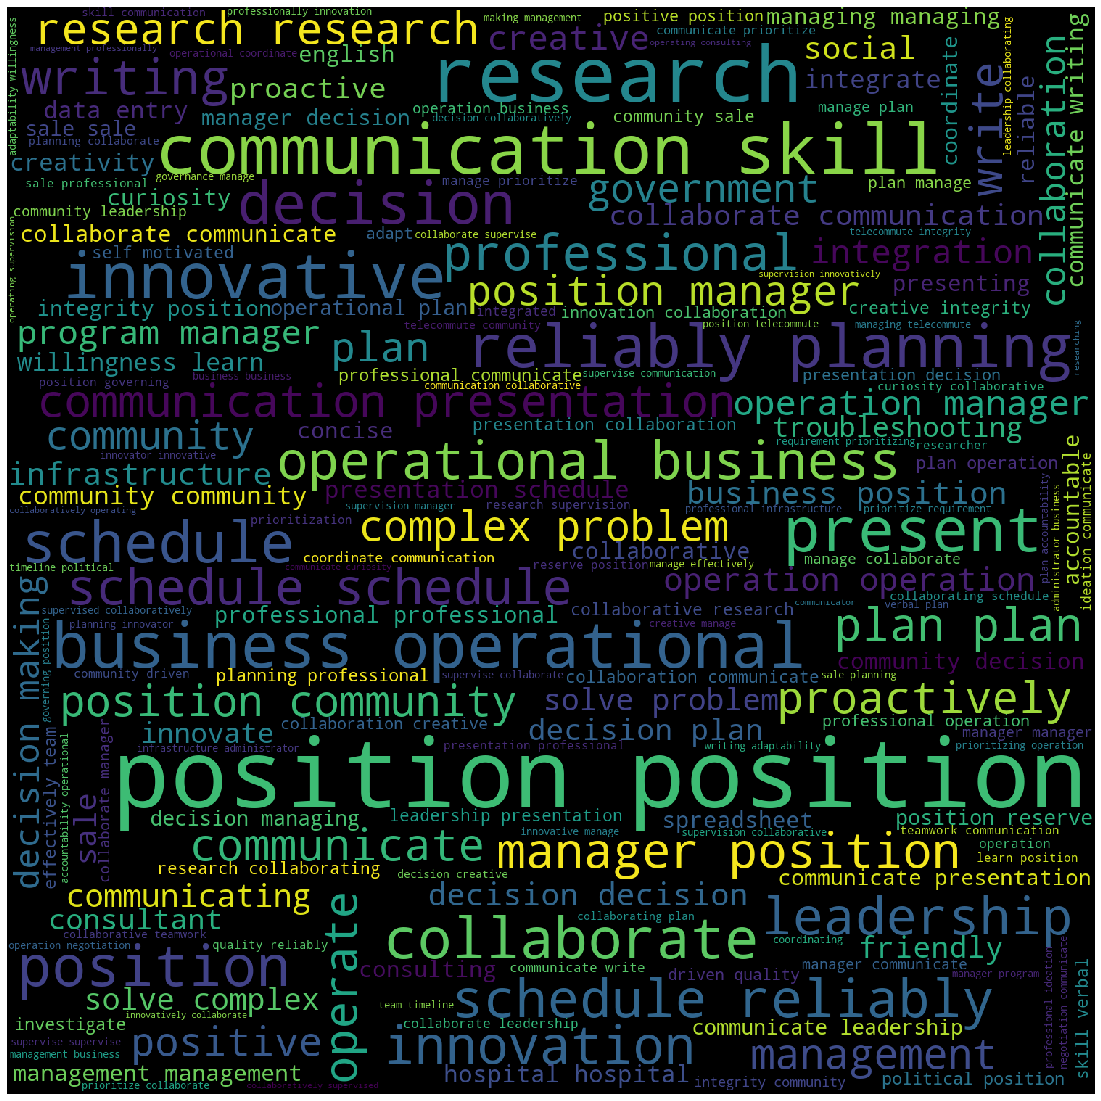

In [ ]:
## Visualize data fot soft skills

# soft skill wordcloud
text = (" ").join(unique_soft) #wordcloud generated by the occurrence of certain skills in the scraped data
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1500, height=1500).generate(text)
# Display the generated image:
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()

### Preparing Data for Clustering

Creating new dataframes to store correlation (relative to each posting)

In [ ]:
#creating dataframes with zeros column
tech_skill_df = pd.DataFrame(np.zeros((len(scraped_data.axes[0]), 1)))
soft_skill_df = pd.DataFrame(np.zeros((len(scraped_data.axes[0]), 1)))

#filling columns with zero's
for i in uni_tech:
    tech_skill_df[str(i)] = 0

for i in uni_soft:
    soft_skill_df[str(i)] = 0

<ipython-input-8-626422d1b44d>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tech_skill_df[str(i)] = 0
<ipython-input-8-626422d1b44d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  soft_skill_df[str(i)] = 0


In [ ]:
#removing the index
tech_skill_df.drop(tech_skill_df.columns[0], axis = 1, inplace = True)
soft_skill_df.drop(soft_skill_df.columns[0], axis = 1, inplace = True)

In [ ]:
#counting occurence of each of the extracted words in each job posting regarding technical skills
for i in range(len(scraped_data.axes[0])): #accounting for each job posting
    for j in uni_tech: #each unique word from scraped technical skills
        if j in scraped_data['hard skill'][i]: #find if that word is in the list of hard skills scraped for that specific job posting
            tech_skill_df[j][i] = 1 #increase occurence to 1 for that index and skill column

In [ ]:
#only used for colab
import shutil

In [ ]:
#same as hard skills, but for soft skills
for i in range(len(scraped_data.axes[0])):
    for j in uni_soft:
        if j in scraped_data['soft skill'][i]:
            soft_skill_df[j][i] = 1

In [ ]:
#Removing obvious non-technical skills from looking at the list of skills
tech_skill_df.drop(['equal', 'disability', 'additional', 'e', 'ad hoc', 'receive', 'person', 'access', 'color'], axis =1, inplace = True)
tech_skill_df.sum().sort_values(ascending = False)

sql                         704
analytics                   612
python                      598
tool                        567
level                       488
                           ... 
personalized development      1
technology control            1
mathematics physical          1
capital venture               1
model statistic               1
Length: 6107, dtype: int64

In [ ]:
#position is not a soft skill, removing this skill
soft_skill_df.drop('position', axis =1, inplace = True)

In [ ]:
#creating a combination of soft and hard skill dataframe for K-Means, for part 4
combined_skill_df = tech_skill_df.join(soft_skill_df, lsuffix='_tech', rsuffix='_soft') #creating suffixes in the event of duplicate skills

In [ ]:
#saving the data
combined_skill_df.to_csv('k_means_data.csv', encoding='utf-8', index=False)
shutil.copy('/content/k_means_data.csv', '/content/drive/MyDrive/MIE1624')

'/content/drive/MyDrive/MIE1624/k_means_data.csv'

In [ ]:
combined_skill_df = pd.read_csv('/content/drive/MyDrive/MIE1624/k_means_data.csv')

#### Hierarchical Clustering Data Prep

In [ ]:
#following sections of lowering the number of features is done for heirarchial clustering
#getting the sum of every column
t = tech_skill_df.sum()
s = soft_skill_df.sum()

In [ ]:
#technical skills
#shrinking the total dataset to be more robust and representative
print(t[t> 145])
# 35 skills with count above 145, ~10% of the total scraped dataset
len(t[t> 145])

limited               156
account               166
united state          176
data visualization    164
data source           205
translate             182
sql                   704
visualization         241
b                     219
data data             255
data                  181
data science          385
r                     348
analytics             612
collect               174
maintain              339
dashboard             292
analytical            411
tableau               349
statistic             219
maintaining           149
data analysis         334
medical               380
industry              398
programming           252
digital               150
datasets              158
m                     182
source                238
python                598
cross functional      155
resource              225
statistical           213
data set              261
level                 488
genetic               150
tool                  567
activity              156
dtype: int64

38

In [ ]:
#soft skills
#shrinking the total dataset to be more robust and representative
print(s[s> 145])
# 27 skills with count above 145, ~10% of the total scraped dataset
len(s[s> 145])

research               285
collaborate            412
professional           317
supervision            157
planning               221
communicate            394
communication skill    156
present                147
decision               381
management             228
creative               162
innovative             204
manager                220
operational            155
community              315
innovation             158
schedule               435
plan                   382
writing                163
leadership             202
presentation           250
collaborative          178
manage                 219
communication          276
reliably               158
collaboration          203
operation              304
dtype: int64


27

In [ ]:
t_final = t[t> 145]
s_final = s[s> 145]

In [ ]:
#removing the unwanted values, hard skills
for i in tech_skill_df.columns:
    if i in t[t <= 145]:
      tech_skill_df.drop(i, axis=1, inplace = True)

In [ ]:
#removing the unwanted values, soft skills
for i in soft_skill_df.columns:
    if i in s[s <= 145]:
      soft_skill_df.drop(i, axis=1, inplace = True)

In [ ]:
#transposing the data so we can compute euclidean distance for tech skills
tech_skill_df = tech_skill_df.T

In [ ]:
#computing the distance matrix for hard skills
dist_mat_t = distance_matrix(tech_skill_df, tech_skill_df, p = 2)
dm_df_t = pd.DataFrame(dist_mat_t, index = tech_skill_df.index, columns=tech_skill_df.index)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#performing min-max scaling such that the data makes more sense and easier for clustering
scaler.fit(dm_df_t)
scaled = scaler.fit_transform(dm_df_t)
scaled_dm_df_t = pd.DataFrame(scaled, columns=dm_df_t.columns, index = dm_df_t.columns)

In [ ]:
#ensuring the distance matrix for hard skills are done correctly
display(scaled_dm_df_t)

,limited,account,united state,data visualization,data source,translate,sql,visualization,b,data data,...,source,python,cross functional,resource,statistical,data set,level,genetic,tool,activity
limited,0.000000,0.639196,0.617522,0.660225,0.694385,0.652791,0.929352,0.757617,0.688462,0.705538,...,0.683451,0.910910,0.664995,0.641455,0.713167,0.789639,0.896364,0.621093,0.904460,0.624004
account,0.649484,0.000000,0.634560,0.677003,0.716365,0.676303,0.944309,0.711120,0.694564,0.684282,...,0.780098,0.968754,0.690012,0.610941,0.726214,0.781079,0.856799,0.649126,0.920670,0.584964
united state,0.649484,0.656832,0.000000,0.697982,0.722828,0.630656,0.977453,0.722462,0.639752,0.692863,...,0.790569,0.921838,0.694464,0.678139,0.724056,0.806486,0.904389,0.669381,0.961538,0.662969
data visualization,0.633388,0.639196,0.636658,0.000000,0.603607,0.669973,0.891574,0.648952,0.684364,0.715930,...,0.767343,0.862508,0.601744,0.662941,0.619202,0.745857,0.843198,0.576493,0.859166,0.658505
data source,0.677275,0.687646,0.670323,0.613680,0.000000,0.687758,0.906452,0.716813,0.705613,0.702391,...,0.770552,0.891062,0.668462,0.703042,0.657210,0.744729,0.877628,0.615092,0.890449,0.661856
translate,0.665190,0.678233,0.611010,0.711625,0.718526,0.000000,0.947003,0.722462,0.652810,0.694992,...,0.718643,0.938754,0.709825,0.696671,0.749543,0.725293,0.934255,0.671594,0.963076,0.693416
sql,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.807688,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.866025,1.000000
visualization,0.721560,0.666548,0.654217,0.644255,0.699945,0.675252,0.885121,0.000000,0.709589,0.674499,...,0.828164,0.861678,0.677619,0.727967,0.712069,0.828079,0.911551,0.666048,0.860026,0.679450
b,0.705018,0.700000,0.622896,0.730516,0.740835,0.656047,0.951700,0.762964,0.000000,0.712828,...,0.845849,0.942556,0.736460,0.713831,0.754745,0.826047,0.849175,0.715451,1.000000,0.698714
data data,0.705018,0.672947,0.658281,0.745714,0.719604,0.681534,0.928666,0.707681,0.695576,0.000000,...,0.816161,0.916390,0.761152,0.738392,0.760940,0.811679,0.928825,0.707107,0.905277,0.636871


In [ ]:
#transposing the data so we can compute euclidean distance for tech skills
soft_skill_df = soft_skill_df.T

In [ ]:
#computing distance matrix for soft skills
dist_mat_s = distance_matrix(soft_skill_df, soft_skill_df, p = 2)
dm_df_s = pd.DataFrame(dist_mat_s, index = soft_skill_df.index, columns=soft_skill_df.index)

In [ ]:
#performing min-max scaling such that the data makes more sense and easier for clustering
scaler.fit(dm_df_s)
scaled = scaler.fit_transform(dm_df_s)
scaled_dm_df_s = pd.DataFrame(scaled, columns=dm_df_s.columns, index = dm_df_s.columns)

In [ ]:
#ensuring the distance matrix for soft skills are done correctly
display(scaled_dm_df_s)

,research,collaborate,professional,supervision,planning,communicate,communication skill,present,decision,management,...,plan,writing,leadership,presentation,collaborative,manage,communication,reliably,collaboration,operation
research,0.000000,0.890317,0.846680,0.800485,0.899834,0.865825,0.853343,0.806718,0.843973,0.888952,...,0.856714,0.860916,0.845154,0.909611,0.798173,0.867512,0.880739,0.898966,0.822051,0.887080
collaborate,0.960249,0.000000,0.924076,0.906289,0.984014,0.853692,0.990830,0.962594,0.905446,0.923865,...,0.946123,0.993114,0.902269,0.920885,0.897070,0.840348,0.906879,0.980429,0.917222,0.881054
professional,0.939743,0.950950,0.000000,0.928513,0.893592,0.761559,0.895107,0.879664,0.806745,0.853670,...,0.908144,0.900980,0.876972,0.825258,0.915568,0.857552,0.940272,0.874931,0.819973,0.859188
supervision,0.782461,0.821365,0.817725,0.000000,0.803444,0.846329,0.760324,0.731925,0.808475,0.807962,...,0.836379,0.766965,0.749429,0.847688,0.714736,0.784296,0.814587,0.766296,0.691242,0.808064
planning,0.897326,0.909808,0.802856,0.819661,0.000000,0.839730,0.816911,0.801784,0.865219,0.851549,...,0.896001,0.816497,0.865743,0.751484,0.864601,0.843410,0.861427,0.365679,0.750426,0.789004
communicate,1.000000,0.914180,0.792472,1.000000,0.972572,0.000000,0.986727,0.937533,0.849745,0.883852,...,0.978645,0.910720,0.946722,0.898195,0.944203,0.870478,0.964801,0.966493,0.843566,0.766498
communication skill,0.816118,0.878595,0.771284,0.743907,0.783458,0.817064,0.000000,0.708508,0.781240,0.777160,...,0.857627,0.718113,0.768764,0.798686,0.764085,0.756416,0.847205,0.759947,0.723803,0.780274
present,0.780086,0.863028,0.766387,0.724066,0.777482,0.784942,0.716369,0.000000,0.764067,0.745086,...,0.828861,0.727607,0.741554,0.771198,0.733799,0.762073,0.814587,0.753545,0.705899,0.755497
decision,0.972726,0.967576,0.837739,0.953277,1.000000,0.847971,0.941493,0.910695,0.000000,0.916989,...,0.849376,0.943502,0.883641,0.927989,0.969963,0.910043,1.000000,0.997089,0.882132,0.959611
management,0.900422,0.867635,0.779056,0.837240,0.864948,0.775135,0.823095,0.780466,0.805879,0.000000,...,0.804914,0.808048,0.796273,0.819555,0.791972,0.687393,0.797191,0.839897,0.747008,0.740233


## Hierarchical Clustering and Dendrogram

In [ ]:
#initialize toolkit needed for heirarchical clustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean

#### hard skills

In [ ]:
#clustering with euclidean distance and max distance (fartherst point) calculation
Y_t = sch.linkage(scaled_dm_df_t, method='ward', metric = 'euclidean')

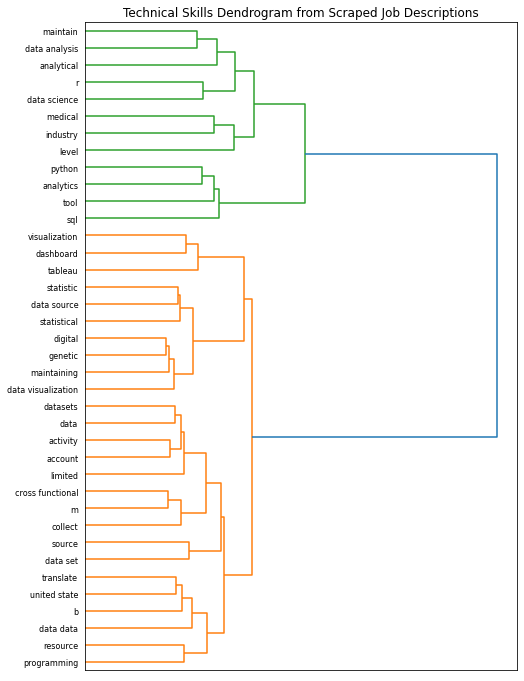

In [ ]:
#plotting the technical data in dendrogram
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

#generating dendrogram from hierarchical clustering
Z1 = sch.dendrogram(Y_t, orientation='right')

# Get labels
labels = scaled_dm_df_t.index[Z1['leaves']]


ax1.set_xticks([])
ax1.set_yticklabels(labels)

plt.plot()
plt.title('Technical Skills Dendrogram from Scraped Job Descriptions')
plt.show()

#### soft skills

In [ ]:
Y_s = sch.linkage(scaled_dm_df_s, method='ward', metric = 'euclidean')

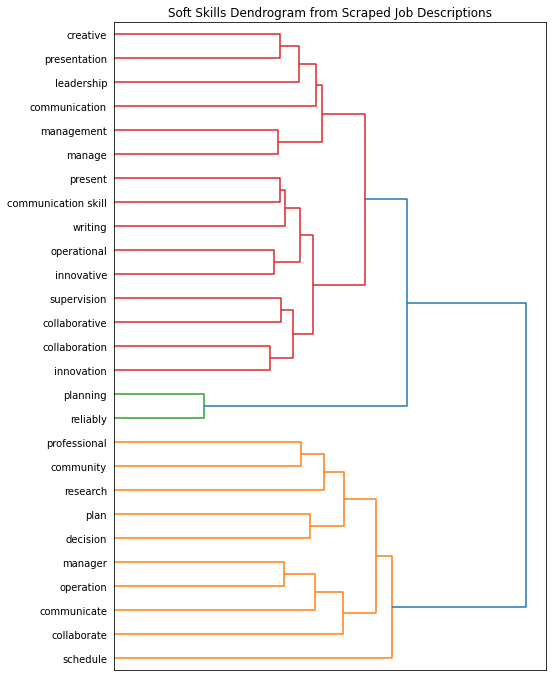

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = sch.dendrogram(Y_s, orientation='right')

# Get labels
labels = scaled_dm_df_s.index[Z1['leaves']]


ax1.set_xticks([])
ax1.set_yticklabels(labels)

plt.plot()
plt.title('Soft Skills Dendrogram from Scraped Job Descriptions')
plt.show()

In [ ]:
cluster_tech = pd.DataFrame(index = tech_skill_df.index)

In [ ]:
#creating the cluster label for technical skills, adusting how many clusters by changing the t parameter
labels = sch.fcluster(Y_t, t = 1.5,criterion='distance')
cluster_tech["heir_Clusters"]=labels-1
cluster_tech

,heir_Clusters
programming,0
level,4
genetic,1
industry,4
data source,1
m,0
cross functional,0
digital,1
data analysis,5
analytics,3


In [ ]:
cluster_soft = pd.DataFrame(index = soft_skill_df.index)

In [ ]:
#creating the cluster label for soft skills, adusting how many clusters by changing the t parameter
labels = sch.fcluster(Y_s, t = 1.6,criterion='distance')
cluster_soft["heir_Clusters"]=labels-1
cluster_soft

,heir_Clusters
manage,3
leadership,3
communication,3
presentation,3
writing,3
research,0
collaborative,3
collaborate,0
innovative,3
communication skill,3


## K-Means

generate PCA from BOW or TDIDF, get top 10 PCA and conduct clustering per PC

Get the skills related to each cluster (PC) by back converting the PC to BOW vector then Job Description

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
k_means_combined = combined_skill_df.T

In [ ]:
#performing PCA so we can perform K-means and visualize scatter plot
pca = PCA(10)
df_c = pca.fit_transform(k_means_combined)

In [ ]:
PCA_df = pd.DataFrame(data = df_c, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10'])

###PCA

#### PC_1

In [ ]:
#absolute maximum
PCA_df['PC_1'].abs().sort_values(ascending = False).head(10)

3666    20.152370
1702    19.400348
2061    18.816964
2895    17.883956
5424    13.605057
879     13.224971
1013    12.402138
6523    12.250915
696     12.199595
4363    12.038073
Name: PC_1, dtype: float64

In [ ]:
#checking if any of the top 10 are negative
PCA_df['PC_1'].sort_values(ascending = True).head(10)

904    -0.249820
299    -0.248745
5986   -0.248745
361    -0.248547
5667   -0.247633
5687   -0.247633
6349   -0.247633
3935   -0.247467
3148   -0.247176
939    -0.247094
Name: PC_1, dtype: float64

In [ ]:
PC_1 = pd.DataFrame(data = PCA_df['PC_1'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_1
combined_skill_df.columns[PC_1.index]

Index(['sql', 'analytics', 'python', 'tool', 'level', 'data science',
       'analytical', 'communicate', 'r', 'tableau'],
      dtype='object')

#### PC_2

In [ ]:
#absolute maximum
PCA_df['PC_2'].abs().sort_values(ascending = False).head(10)

1013    7.273303
6528    6.005099
6371    5.974633
996     5.584459
5334    5.561090
6248    5.392864
5740    5.336315
2516    5.039367
6271    4.702843
5708    4.672108
Name: PC_2, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_2'].sort_values(ascending = True).head(10)

6528   -6.005099
6371   -5.974633
996    -5.584459
5334   -5.561090
6248   -5.392864
5740   -5.336315
5708   -4.672108
6263   -4.369232
6294   -4.169402
6308   -4.017813
Name: PC_2, dtype: float64

In [ ]:
PC_2 = pd.DataFrame(data = PCA_df['PC_2'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_2
combined_skill_df.columns[PC_2.index]

Index(['analytical', 'communication_soft', 'plan', 'self service',
       'strategic decision', 'management_soft', 'maintaining', 'source',
       'collaboration', 'programming'],
      dtype='object')

here we can see entries 1013, 2516 and 6271 (analytical, source, collaboration) are strongly positively correlated with the rest of the 7 negatively correlated components identified in PC2

#### PC_3

In [ ]:
#absolute maximum
PCA_df['PC_3'].abs().sort_values(ascending = False).head(10)

4825    5.608773
1654    5.272746
3764    5.211666
3420    5.144357
6439    5.101762
4036    5.088918
1191    4.939530
901     4.893044
6181    4.817030
5663    4.815694
Name: PC_3, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_3'].sort_values(ascending = True).head(10)

1654   -5.272746
3764   -5.211666
3420   -5.144357
6439   -5.101762
4036   -5.088918
1191   -4.939530
901    -4.893044
6181   -4.817030
5663   -4.815694
6483   -4.771662
Name: PC_3, dtype: float64

In [ ]:
PC_3 = pd.DataFrame(data = PCA_df['PC_3'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_3
combined_skill_df.columns[PC_3.index]

Index(['data analysis', 'childbirth', 'cross functional',
       'continuous improvement', 'reliably', 'process flow',
       'delivery process', 'logistics', 'professional_soft', 'maintains'],
      dtype='object')

Here, entry 4825 is the only skill positively correlated with PC 3. It is odd to see childbirth at all.

#### PC_4

In [ ]:
#absolute maximum
PCA_df['PC_4'].abs().sort_values(ascending = False).head(10)

6407    7.627569
3669    6.853080
5168    5.760691
954     5.360379
958     5.341365
706     5.298274
5205    5.266512
6528    5.082797
6371    4.902616
3309    4.741934
Name: PC_4, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_4'].sort_values(ascending = True).head(10)

2061   -4.283144
6333   -3.746491
879    -3.717923
696    -3.173941
1441   -2.908810
3666   -2.873502
5724   -2.797667
6056   -2.759764
4619   -2.608896
4435   -2.606651
Name: PC_4, dtype: float64

In [ ]:
PC_4 = pd.DataFrame(data = PCA_df['PC_4'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_4
combined_skill_df.columns[PC_4.index]

Index(['operation_soft', 'resource', 'maintain', 'user requirement',
       'develop test', 'development company', 'day day', 'communication_soft',
       'plan', 'business unit'],
      dtype='object')

Here, all entries are positively correlated with PC_4.

#### PC_5

In [ ]:
#absolute maximum
PCA_df['PC_5'].abs().sort_values(ascending = False).head(10)

4363    5.310117
5037    5.053073
6109    4.818904
5011    4.684653
1702    4.666329
275     4.630725
1614    4.565703
4925    4.515974
6130    4.515514
1968    4.498333
Name: PC_5, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_5'].sort_values(ascending = True).head(10)

1702   -4.666329
2061   -3.902264
6333   -3.714258
879    -3.586912
5708   -3.298308
5424   -2.987076
4825   -2.891627
6371   -2.794617
5060   -2.751041
5790   -2.740889
Name: PC_5, dtype: float64

In [ ]:
PC_5 = pd.DataFrame(data = PCA_df['PC_5'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_5
combined_skill_df.columns[PC_5.index]

Index(['tableau', 'data warehouse', 'manager_soft', 'dashboard', 'analytics',
       'activity', 'data quality', 'data governance', 'prioritizing',
       'metadata'],
      dtype='object')

Here, entry 1702 (analytics) is the only skill negatively correlated with PC_5.

#### PC_6

In [ ]:
#absolute maximum
PCA_df['PC_6'].abs().sort_values(ascending = False).head(10)

6206    8.493737
3319    5.575058
6434    5.462152
5424    5.301985
6210    4.919059
6407    4.861764
1702    4.624062
6371    4.343953
879     4.164673
3669    4.081509
Name: PC_6, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_6'].sort_values(ascending = True).head(10)

6407   -4.861764
1702   -4.624062
879    -4.164673
5465   -3.428765
2061   -3.413259
5427   -3.411188
3060   -3.192738
3691   -3.190216
5918   -3.133258
6003   -3.087045
Name: PC_6, dtype: float64

In [ ]:
PC_6 = pd.DataFrame(data = PCA_df['PC_6'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_6
combined_skill_df.columns[PC_6.index]

Index(['community_soft', 'license', 'schedule', 'level', 'research',
       'operation_soft', 'analytics', 'plan', 'data science', 'resource'],
      dtype='object')

Here, entries 6407, 1702, and 879 (operation_soft, analytics, and data science) are negatively correlated with PC_6.

#### PC_7

In [ ]:
#absolute maximum
PCA_df['PC_7'].abs().sort_values(ascending = False).head(10)

6523    8.546496
1690    6.037932
1085    5.689814
3996    4.576856
760     4.338178
1379    4.200938
202     4.190645
1781    4.187168
3216    4.185831
3191    4.180314
Name: PC_7, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_7'].sort_values(ascending = True).head(10)

3996   -4.576856
6371   -3.812236
4013   -3.628877
3669   -3.131068
6434   -3.051743
6375   -2.849793
3666   -2.640131
6210   -2.388019
2895   -2.349596
6366   -2.124162
Name: PC_7, dtype: float64

In [ ]:
PC_7 = pd.DataFrame(data = PCA_df['PC_7'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_7
combined_skill_df.columns[PC_7.index]

Index(['communicate', 'b', 'building relationship', 'industry', 'actively',
       'cybersecurity', 'engineering electrical', 'computer engineering',
       'biometrics', 'working group'],
      dtype='object')

Here, entries 3996 (industry) is the only skill negatively correlated with PC_7.

#### PC_8

In [ ]:
#absolute maximum
PCA_df['PC_8'].abs().sort_values(ascending = False).head(10)

6515    5.777935
5708    4.728507
6333    4.109494
6434    4.049375
3666    3.968460
2895    3.936882
5686    3.857629
2518    3.637069
5790    3.590201
5060    3.578845
Name: PC_8, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_8'].sort_values(ascending = True).head(10)

6333   -4.109494
3666   -3.968460
2895   -3.936882
5790   -3.590201
5060   -3.578845
6271   -3.560084
6465   -3.480321
5205   -2.914195
2516   -2.894424
6248   -2.872304
Name: PC_8, dtype: float64

In [ ]:
PC_8 = pd.DataFrame(data = PCA_df['PC_8'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_8
combined_skill_df.columns[PC_8.index]

Index(['collaborate', 'programming', 'decision', 'schedule', 'sql', 'tool',
       'united state', 'translate', 'claim', 'cloud computing'],
      dtype='object')

Here, entries 6333, 3666, 2895, 5790, and 5060 (decision, sql, tool, claim, and cloud computing) were negatively correlated with PC_8.

#### PC_9

In [ ]:
#absolute maximum
PCA_df['PC_9'].abs().sort_values(ascending = False).head(10)

4036    5.749278
2518    5.152112
6158    4.750048
3996    4.586508
6315    4.453960
5468    4.370714
547     4.240230
2473    4.160612
3141    4.048057
4068    3.991393
Name: PC_9, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_9'].sort_values(ascending = True).head(10)

5424   -3.748899
5708   -3.024048
6180   -2.408092
2807   -2.406520
6399   -2.321265
6434   -2.134466
4378   -2.089218
3319   -2.055981
5663   -1.771877
6263   -1.707192
Name: PC_9, dtype: float64

In [ ]:
PC_9 = pd.DataFrame(data = PCA_df['PC_9'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_9
combined_skill_df.columns[PC_9.index]

Index(['process flow', 'translate', 'writing', 'industry', 'positive',
       'execute', 'professional development', 'target', 'alternative',
       'business solution'],
      dtype='object')

Here, no entries are negatively correlated with PC_9.

#### PC_10

In [ ]:
#absolute maximum
PCA_df['PC_10'].abs().sort_values(ascending = False).head(10)

6528    5.935002
6399    3.910756
4013    3.880481
6434    3.848580
6375    3.696699
3309    3.599063
6308    3.554885
6366    3.472776
2473    3.396363
54      3.243790
Name: PC_10, dtype: float64

In [ ]:
#checking negative magnitude
PCA_df['PC_10'].sort_values(ascending = True).head(10)

4013   -3.880481
6375   -3.696699
3309   -3.599063
6308   -3.554885
6366   -3.472776
54     -3.243790
1268   -3.223481
3268   -3.134483
227    -3.104153
2797   -3.054791
Name: PC_10, dtype: float64

In [ ]:
PC_10 = pd.DataFrame(data = PCA_df['PC_10'].abs().sort_values(ascending = False).head(10))

In [ ]:
#identifying the top 10 skills associated with PC_10
combined_skill_df.columns[PC_10.index]

Index(['communication_soft', 'supervision', 'medical', 'schedule',
       'innovative', 'business unit', 'manage', 'operational', 'target',
       'investment'],
      dtype='object')

Here, entries 4013, 6375, 3309, 6308, 6366, and 54 (medical, innovative, business unit, manage, operational, and investment) are negatively correlated with PC_10.

This analysis is done such that we can see which skills are classified to be non-correlated by PCA.

### K-Means Clustering Determination and Plotting

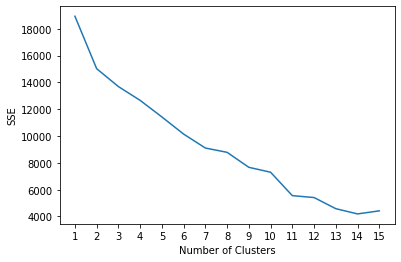

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 15,
"random_state": 1624,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 16), sse)
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

elbow occurs at 11, 11 clusters will be chosen

In [ ]:
#initializing new K-Means model for tech data
km_cs = KMeans(n_clusters=11, init ='k-means++', max_iter=300, n_init=10,random_state=1624)
label = km_cs.fit_predict(df_c)

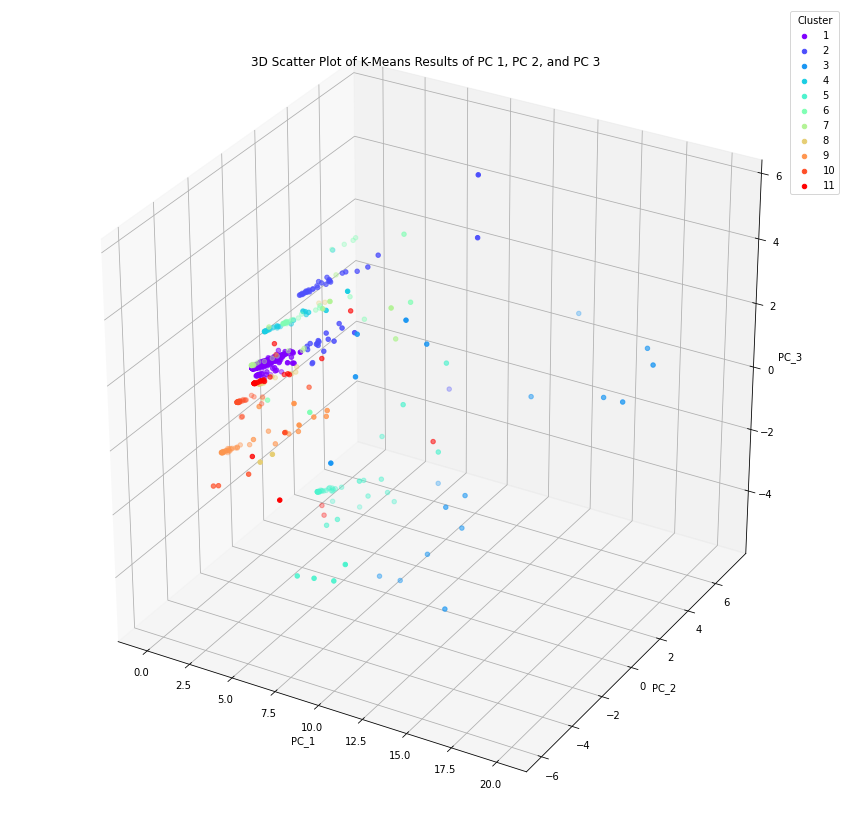

In [ ]:
#plotting the 11 clusters in 3D space to maximize cluster separation and minimize overlap

def get_cmap(n, name='rainbow'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(11)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for i in range(11):
  ax.scatter(df_c[label==i][:,0], df_c[label==i][:,1], df_c[label==i][:,2], color =cmap(i), label = str(i+1))
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')
plt.title('3D Scatter Plot of K-Means Results of PC 1, PC 2, and PC 3')
ax.legend(title = 'Cluster')
plt.show()


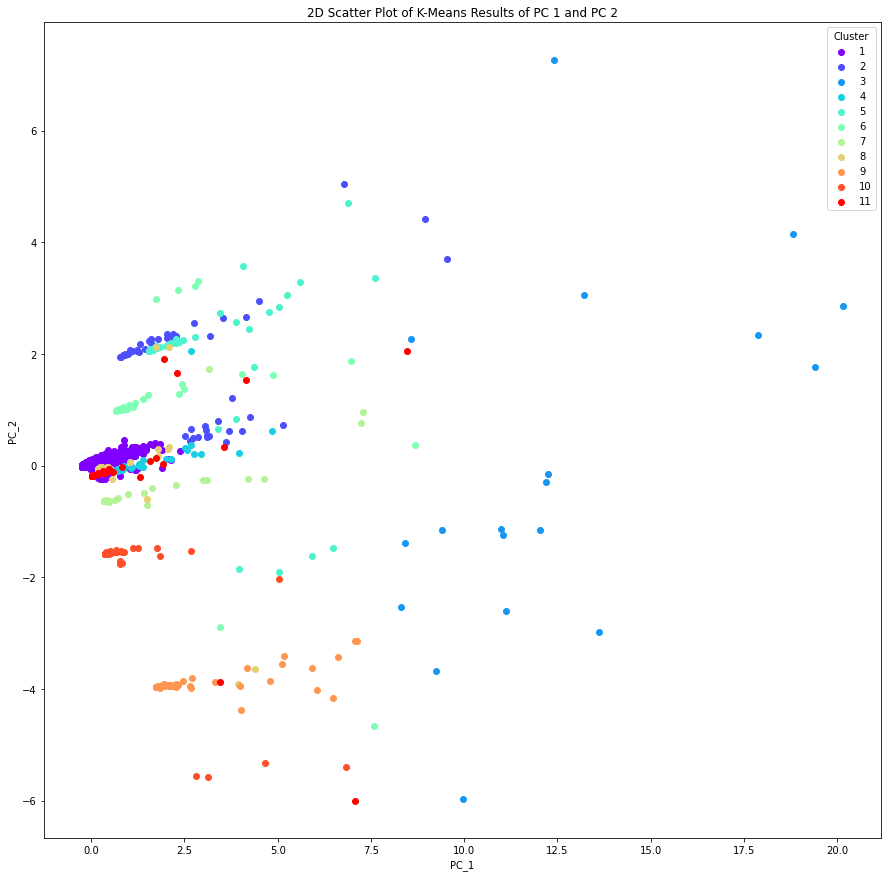

In [ ]:
#plotting the 11 clusters in 2D space as second visualization
cmap = get_cmap(11)
fig = plt.figure(figsize=(15, 15))
for i in range(11):
  plt.scatter(df_c[label==i][:,0], df_c[label==i][:,1], color =cmap(i), label = str(i+1))
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('2D Scatter Plot of K-Means Results of PC 1 and PC 2')
plt.legend(title = 'Cluster')
plt.show()

In [ ]:
#Finding the skills related to each cluster
#matching labels with index values
PCA_df['pred_label'] = label

#isolating index values by label
cluster1 = PCA_df.loc[PCA_df['pred_label'] == 0]
cluster2 = PCA_df.loc[PCA_df['pred_label'] == 1]
cluster3 = PCA_df.loc[PCA_df['pred_label'] == 2]
cluster4 = PCA_df.loc[PCA_df['pred_label'] == 3]
cluster5 = PCA_df.loc[PCA_df['pred_label'] == 4]
cluster6 = PCA_df.loc[PCA_df['pred_label'] == 5]
cluster7 = PCA_df.loc[PCA_df['pred_label'] == 6]
cluster8 = PCA_df.loc[PCA_df['pred_label'] == 7]
cluster9 = PCA_df.loc[PCA_df['pred_label'] == 8]
cluster10 = PCA_df.loc[PCA_df['pred_label'] == 9]
cluster11 = PCA_df.loc[PCA_df['pred_label'] == 10]

#identifying each cluster by index, grabbing only the top 10 skills 
cluster1_skills = combined_skill_df.columns[cluster1.index]
cluster2_skills = combined_skill_df.columns[cluster2.index]
cluster3_skills = combined_skill_df.columns[cluster3.index]
cluster4_skills = combined_skill_df.columns[cluster4.index]
cluster5_skills = combined_skill_df.columns[cluster5.index]
cluster6_skills = combined_skill_df.columns[cluster6.index]
cluster7_skills = combined_skill_df.columns[cluster7.index]
cluster8_skills = combined_skill_df.columns[cluster8.index]
cluster9_skills = combined_skill_df.columns[cluster9.index]
cluster10_skills = combined_skill_df.columns[cluster10.index]
cluster11_skills = combined_skill_df.columns[cluster11.index]

skills = [cluster1_skills,cluster2_skills,cluster3_skills,cluster4_skills,cluster5_skills,cluster6_skills,cluster7_skills,cluster8_skills,cluster9_skills,cluster10_skills,cluster11_skills]

In [ ]:
#printing the results of each cluster
for i in range(11):
  print("cluster ", i+1, ": ", skills[i])

cluster  1 :  Index(['application platform', 'operating system', 'search engine',
       'model provide', 'design document', 'medicare', 'program networking',
       'research reporting', 'technology control', 'point contact',
       ...
       'persistent', 'inspire trust', 'articulated', 'people manage',
       'valid driver license', 'supervising', 'arabic', 'creativity',
       'self motivated self', 'motivated team'],
      dtype='object', length=6146)
cluster  2 :  Index(['model business', 'economics', 'physical', 'sampling',
       'statistical analysis', 'numpy', 'algorithm', 'experimentation',
       'automation marketing', 'predictive model', 'addition', 'build model',
       'reflective', 'data model', 'source', 'human', 'predictive',
       'cloud azure', 'prescriptive', 'track', 'image', 'model development',
       'pytorch', 'linear', 'industry', 'best practice', 'equity',
       'product development', 'visualize', 'work environment', 'data analysis',
       'deliberate',